In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [ ]:
data = pd.read_csv('/content/creditcard.csv (1).zip')
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [ ]:
mean = X_train_resampled.mean(axis=0)
std = X_train_resampled.std(axis=0)
X_train_resampled = (X_train_resampled - mean) / std
X_test = (X_test - mean) / std


In [ ]:
X_train_reshaped = np.array(X_train_resampled).reshape(X_train_resampled.shape[0], 1, X_train_resampled.shape[1])
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train_reshaped, y_train_resampled, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
5687/5687 [==============================] - 39s 6ms/step - loss: 0.0478 - accuracy: 0.9837 - val_loss: 0.0614 - val_accuracy: 0.9779
Epoch 2/10
5687/5687 [==============================] - 30s 5ms/step - loss: 0.0191 - accuracy: 0.9933 - val_loss: 0.0279 - val_accuracy: 0.9877
Epoch 3/10
5687/5687 [==============================] - 30s 5ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 4/10
5687/5687 [==============================] - 29s 5ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0065 - val_accuracy: 0.9981
Epoch 5/10
5687/5687 [==============================] - 28s 5ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0050 - val_accuracy: 0.9995
Epoch 6/10
5687/5687 [==============================] - 28s 5ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 7/10
5687/5687 [==============================] - 35s 6ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0058 - val_ac

In [ ]:
y_pred = model.predict(X_test_reshaped)


1781/1781 [==============================] - 4s 2ms/step


In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)



In [ ]:
print(precision)
print(recall)
print(f1)
print(accuracy)

0.6507936507936508
0.8367346938775511
0.7321428571428571
0.9989466661985184


In [ ]:
from sklearn.metrics import classification_report


y_pred = np.round(model.predict(X_test_reshaped))
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

1781/1781 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.84      0.73        98

    accuracy                           1.00     56962
   macro avg       0.83      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



ANN

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'creditcardfraud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F310%2F23498%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240503%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240503T071203Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8e3fab505d2dea3679c43fc90644b716545fbd862fc985a426d04a991909626944ed48887e9089965f38a130c2b4403c6969d35a35caf21762f2596c5cf92ca55e989f2c9efac8b9d43070bc8a55cb362f48f9cf69f0036f39327c91dd7e350abc21f5cfb3246e468e3fdc20ff47f4a51c113392f5cd3d1febc9edcb2843c52d4196c0c6472e6696c9e9d8a6eaa9fd63c17a46196511b718bfde94e7c0abdafef43c88bbfe6bae9cd0d9310e1cd3b198d745bb857e9400bd515221b1d41ce750ad18e2ed7dd32d22dc45a58cbe9cda9ddda67508631fea8777cbf8af2119895e6d08dfe5677afed8e421a458fe55999ad7cfbc9ae2200000271f100cd8e2b6d2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 69155672 bytes downloaded
Downloaded and uncompressed: creditcardfraud
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.regularizers import l2

import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [ ]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[['Time', 'Amount']] = sc.fit_transform(dataset[['Time', 'Amount']])

In [ ]:
x = dataset.drop('Class', axis=1).values
y = dataset['Class']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (227845, 30)
Number transactions y_train dataset:  (227845,)
Number transactions x_test dataset:  (56962, 30)
Number transactions y_test dataset:  (56962,)


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

from collections import Counter

In [ ]:
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.7)

steps = [('o', over), ('u', under)]

In [ ]:
pipeline = Pipeline(steps=steps)

# transform the dataset
x_sm, y_sm = pipeline.fit_resample(x_train, y_train)

print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 227454, 1: 391})
Counter({0: 129972, 1: 90981})


In [ ]:
pass

!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
from tensorflow.keras.layers import Input, Reshape, LSTM, Dropout, Dense, Activation, Layer
from tensorflow.keras.models import Model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))



In [ ]:
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
ann_history = ann.fit(x_sm, y_sm, batch_size= 32, epochs= 50, validation_split= 0.3)

Epoch 1/50
4834/4834 [==============================] - 32s 6ms/step - loss: 0.1305 - accuracy: 0.9759 - val_loss: 0.1065 - val_accuracy: 0.9690
Epoch 2/50
4834/4834 [==============================] - 15s 3ms/step - loss: 0.0536 - accuracy: 0.9915 - val_loss: 0.0892 - val_accuracy: 0.9728
Epoch 3/50
4834/4834 [==============================] - 13s 3ms/step - loss: 0.0439 - accuracy: 0.9922 - val_loss: 0.0693 - val_accuracy: 0.9794
Epoch 4/50
4834/4834 [==============================] - 14s 3ms/step - loss: 0.0397 - accuracy: 0.9929 - val_loss: 0.0713 - val_accuracy: 0.9765
Epoch 5/50
4834/4834 [==============================] - 13s 3ms/step - loss: 0.0371 - accuracy: 0.9933 - val_loss: 0.0738 - val_accuracy: 0.9780
Epoch 6/50
4834/4834 [==============================] - 14s 3ms/step - loss: 0.0353 - accuracy: 0.9934 - val_loss: 0.0922 - val_accuracy: 0.9740
Epoch 7/50
4834/4834 [==============================] - 15s 3ms/step - loss: 0.0340 - accuracy: 0.9936 - val_loss: 0.0701 - val_ac

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,precision_score,recall_score,f1_score

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy-',accuracy_score(y_test, y_pred))
print('precision-',precision_score(y_test, y_pred))
print('f1-',f1_score(y_test, y_pred))
print('recall-',recall_score(y_test, y_pred))

1781/1781 [==============================] - 3s 2ms/step
[[56736   125]
 [   13    88]]
accuracy- 0.9975773322565921
precision- 0.4131455399061033
f1- 0.5605095541401274
recall- 0.8712871287128713


In [ ]:
from sklearn.metrics import classification_report



# Get the true labels
y_true = y_test

# Print the classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.41      0.87      0.56       101

    accuracy                           1.00     56962
   macro avg       0.71      0.93      0.78     56962
weighted avg       1.00      1.00      1.00     56962



AUTOENCODER USING LINEAR REGRESSION

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'creditcardfraud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F310%2F23498%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T053051Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2e44c6c9b98e74f75872500ba2e199b34249ed4b63fdf10bfd47ab8701236b5a240797e53167f8df1e643d6bd084aab8e4f3bebe85a1e1480b0b07b1513f65835e7b5b4a7c72969abf4671e0006e7a1960e9b001cdb6ac170240789494a4af269448db476ff77fd248c9b98407522024988d801e7616ce1fc826c9b0405310dae557cfec4e962dfa8da13b39377d7a04a30f02b69f0de0abac71dd51884ab0adca7553f906f71639298e031e9e3b6991c043b3a3aa5e22057c1627c055fb6915822f478e0b4a7893cd5a4ecdf84e439ae4c3c03b48f39a84c0464457c6c6b3fc5769d3ac6f4bde080d79ce01bc98a288141adf66816c6f2d7e10857671db97c1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 69155672 bytes downloaded
Downloaded and uncompressed: creditcardfraud
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn related libraries
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Keras NN related libraries
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [ ]:
data_path = '/kaggle/input/creditcardfraud/creditcard.csv'

# print(os.path.exists(data_path))

# Load the data
card_df = pd.read_csv(data_path, header=0)

In [ ]:
card_df.info()
print("===="*30)
card_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# Unique class labels
print(f"Unique classes in the dataset are : {np.unique(card_df['Class'])}" )

Unique classes in the dataset are : [0 1]


<Axes: xlabel='Class'>

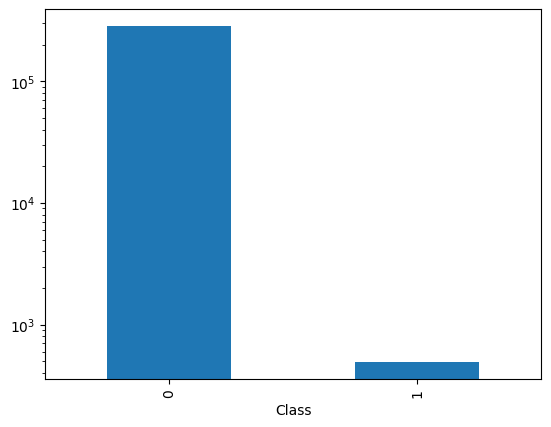

In [ ]:
card_df.groupby('Class')['Class'].count().plot.bar(logy=True)

In [ ]:
# Change the time attribute in day
card_df['Time'] = card_df['Time'].apply(lambda t: (t/3600) % 24 )

In [ ]:
# Sampling of data
normal_trans = card_df[card_df['Class'] == 0].sample(4000)
fraud_trans = card_df[card_df['Class'] == 1]

In [ ]:
# Concatenate normal_trans and fraud_trans
reduced_set = pd.concat([normal_trans, fraud_trans]).reset_index(drop=True)

In [ ]:
print(f"Cleansed dataset shape : {reduced_set.shape}")

Cleansed dataset shape : (4492, 31)


In [ ]:
# Splitting the dataset into X and y features
y = reduced_set['Class']
X = reduced_set.drop('Class', axis=1)


In [ ]:
print(f"Shape of Features : {X.shape} and Target: {y.shape}")

Shape of Features : (4492, 30) and Target: (4492,)


In [ ]:
def dimensionality_plot(X, y):
    sns.set(style='whitegrid', palette='muted')
    # Initializing TSNE object with 2 principal components
    tsne = TSNE(n_components=2, random_state = 42)

    # Fitting the data
    X_trans = tsne.fit_transform(X)

    plt.figure(figsize=(12,8))

    plt.scatter(X_trans[np.where(y == 0), 0], X_trans[np.where(y==0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Normal')
    plt.scatter(X_trans[np.where(y == 1), 0], X_trans[np.where(y==1), 1], marker='o', color='k', linewidth=1, alpha=0.8, label='Fraud')

    plt.legend(loc = 'best')

    plt.show()

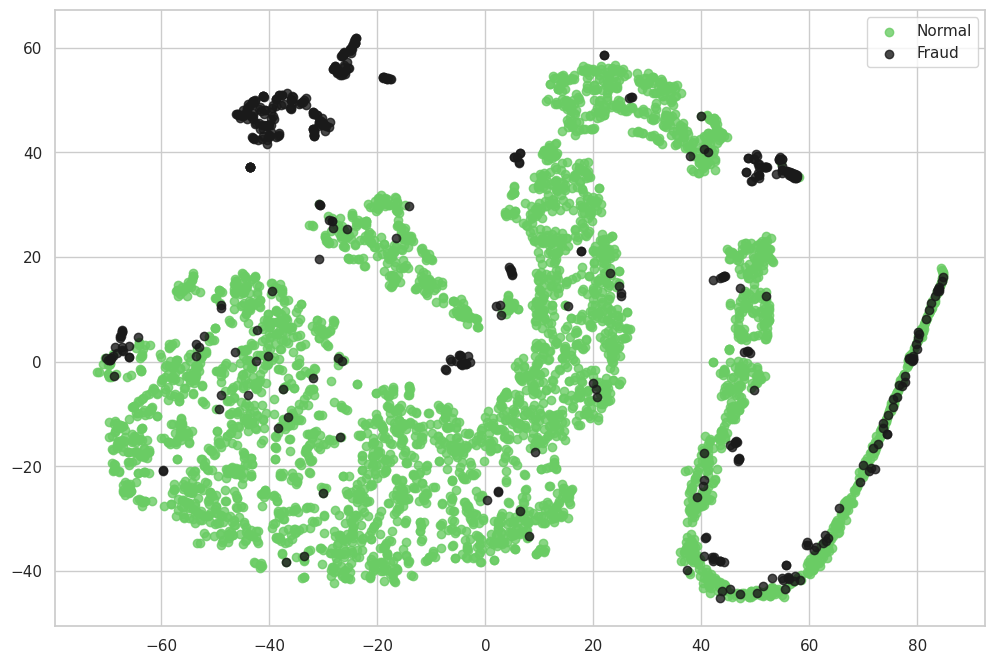

In [ ]:
# Invoking the method dimensionality_plot
dimensionality_plot(X, y)

In [ ]:
scaler = RobustScaler().fit_transform(X)

# Scaled data
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

In [ ]:
print(f"Shape of the input data : {X.shape[1]}")

Shape of the input data : 30


In [ ]:
# Input layer with a shape of features/columns of the dataset
input_layer = Input(shape = (X.shape[1], ))

# Construct encoder network
encoded = Dense(100, activation= 'tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation = 'tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation='relu')(encoded)

# Decoder network
decoded = Dense(12, activation='tanh')(encoded)
decoded = Dense(25, activation='tanh')(decoded)
decoded = Dense(50, activation='tanh')(decoded)
decoded = Dense(100, activation='tanh')(decoded)

output_layer = Dense(X.shape[1], activation='relu')(decoded)

# Building a model
auto_encoder = Model(input_layer, output_layer)

In [ ]:
# Compile the auto encoder model
auto_encoder.compile(optimizer='adadelta', loss='mse')

# Training the auto encoder model
auto_encoder.fit(X_scaled_normal, X_scaled_normal, batch_size=32, epochs=20, shuffle=True, validation_split=0.20)

Epoch 1/20
100/100 [==============================] - 3s 7ms/step - loss: 1.3268 - val_loss: 2.1593
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 1.3263 - val_loss: 2.1588
Epoch 3/20
100/100 [==============================] - 0s 5ms/step - loss: 1.3258 - val_loss: 2.1583
Epoch 4/20
100/100 [==============================] - 0s 4ms/step - loss: 1.3253 - val_loss: 2.1577
Epoch 5/20
100/100 [==============================] - 0s 4ms/step - loss: 1.3247 - val_loss: 2.1572
Epoch 6/20
100/100 [==============================] - 0s 4ms/step - loss: 1.3242 - val_loss: 2.1567
Epoch 7/20
100/100 [==============================] - 0s 4ms/step - loss: 1.3237 - val_loss: 2.1562
Epoch 8/20
100/100 [==============================] - 0s 5ms/step - loss: 1.3232 - val_loss: 2.1556
Epoch 9/20
100/100 [==============================] - 0s 4ms/step - loss: 1.3227 - val_loss: 2.1551
Epoch 10/20
100/100 [==============================] - 0s 4ms/step - loss: 1.3222 - val_loss: 2.1545

In [ ]:
latent_model = Sequential()
latent_model.add(auto_encoder.layers[0])
latent_model.add(auto_encoder.layers[1])
latent_model.add(auto_encoder.layers[2])
latent_model.add(auto_encoder.layers[3])
latent_model.add(auto_encoder.layers[4])

In [ ]:
normal_tran_points = latent_model.predict(X_scaled_normal)
fraud_tran_points = latent_model.predict(X_scaled_fraud)
# Making as a one collection
encoded_X = np.append(normal_tran_points, fraud_tran_points, axis=0)
y_normal = np.zeros(normal_tran_points.shape[0])
y_fraud = np.ones(fraud_tran_points.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)


16/16 [==============================] - 0s 3ms/step


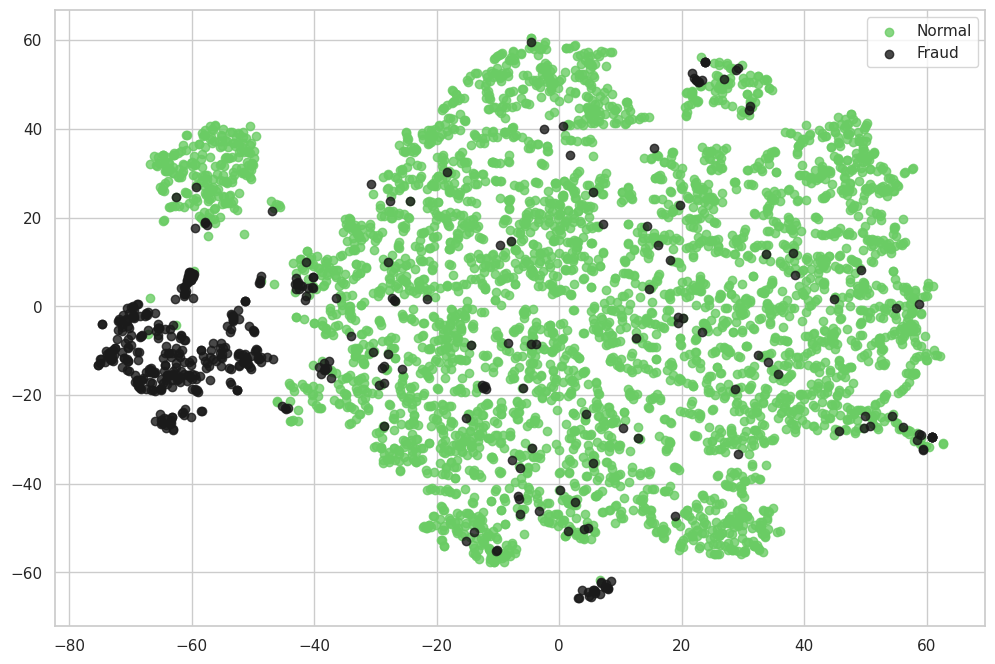

In [ ]:
# Calling TSNE plot function
dimensionality_plot(encoded_X, encoded_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(encoded_X, encoded_y, test_size=0.3)

In [ ]:
print(f"Encoded train data X: {X_enc_train.shape}, Y: {y_enc_train.shape}, X_test :{X_enc_test.shape}, Y_test: {y_enc_test.shape}")
print(f"Actual train & test data X: {X_train.shape}, Y: {X_train.shape}, X_test :{X_test.shape}, Y_test: {y_test.shape}")

Encoded train data X: (3144, 12), Y: (3144,), X_test :(1348, 12), Y_test: (1348,)
Actual train & test data X: (3144, 30), Y: (3144, 30), X_test :(1348, 30), Y_test: (1348,)


autoencoder with linear classifier

In [ ]:
lr_clf = LogisticRegression()

lr_clf.fit(X_enc_train, y_enc_train)

# Predict the Test data
predictions = lr_clf.predict(X_enc_test)

In [ ]:
print("Classification report \n {0}".format(classification_report(y_enc_test, predictions)))


Classification report 
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1185
         1.0       0.97      0.40      0.57       163

    accuracy                           0.93      1348
   macro avg       0.95      0.70      0.76      1348
weighted avg       0.93      0.93      0.91      1348



In [ ]:
print("Accuracy score is : {:.2f}".format(accuracy_score(y_enc_test, predictions)))

Accuracy score is : 0.93


CNN

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'creditcardfraud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F310%2F23498%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T070002Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D98fd8170e93915039690d47cd4c028f612f9dd0721fa9808ab3eb4b553cd5f0112d2812969720a1694078a3091a6800e5d50838834de597631377c3c275b60c7f73dc02908d645aeb9647355038ba1b34bb5322f3fa4f02920eeacf95d1918215f8b11f28020f74912b6999944d94e50f0c5eeb8f907038e414eb520e14fd6947e4b18e61c1386c43b145605e7aa7b6f1e23726ce00b7af7f8bc5402ac12e06bd98d31d022aaed93fb4e330b521f62ff12ee44d0fa202a7860dba1a238f443c10e3c3df38d0db03aa1c412ebff54843132fcd1babe06275a7d1f16e75d42756e4a772c383e73be22fb133690a415795b33b5b731c2ac7420483519ac017d07c7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 69155672 bytes downloaded
Downloaded and uncompressed: creditcardfraud
Data source import complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, precision_recall_curve

In [ ]:
# Load the dataset
dataset = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [ ]:
# Display basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Display the first few rows of the dataset
print(dataset.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Display class distribution
print(dataset['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Splitting the data
x = dataset.drop(columns=['Class'])  # Features
y = dataset['Class']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Data Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Model architecture
model1 = Sequential([
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(units=64, activation='relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

In [ ]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
7121/7121 [==============================] - 64s 8ms/step - loss: 0.0213 - accuracy: 0.9952 - val_loss: 0.0105 - val_accuracy: 0.9988
Epoch 2/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9994
Epoch 3/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 4/10
7121/7121 [==============================] - 57s 8ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 57s 8ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0033 - val_ac

In [ ]:
# Evaluation
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1781/1781 [==============================] - 14s 8ms/step - loss: 0.0034 - accuracy: 0.9994
Test Loss: 0.0033823936246335506
Test Accuracy: 0.9993855357170105


In [ ]:
# Predictions and evaluation metrics
y_pred_prob = model1.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

1781/1781 [==============================] - 4s 2ms/step


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56842    19]
 [   18    83]]


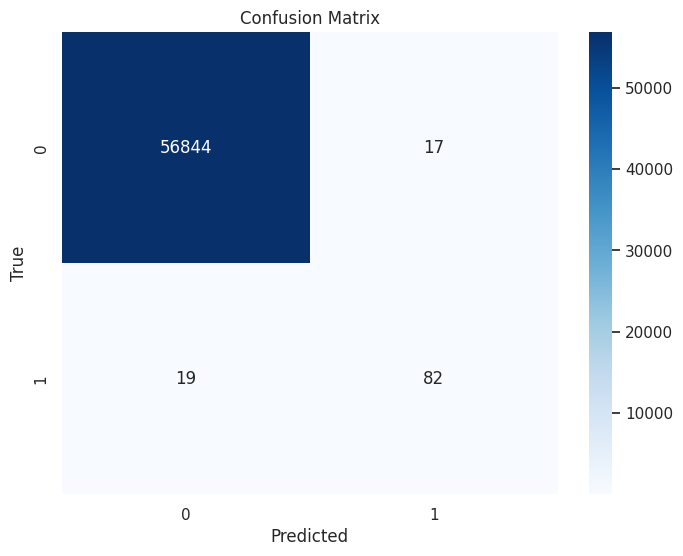

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Accuracy Score
acc_cm = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_cm)

Accuracy: 0.999385555282469


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.81      0.82       101

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Input
import numpy as np

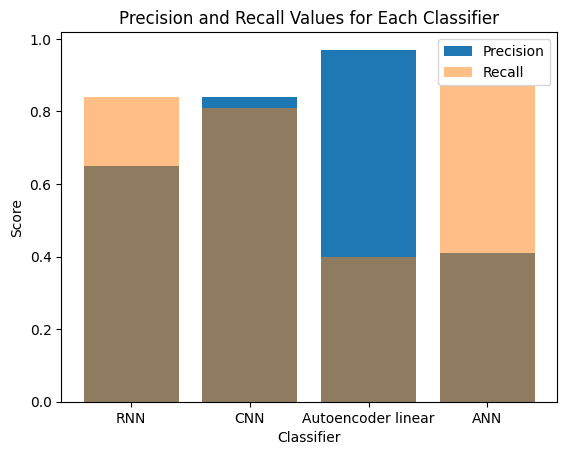

Majority Class for Voting Classifier: Class 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classification reports for each classifier
classification_reports = {
    'RNN': {
        'precision': 0.65,
        'recall': 0.84
    },
    'CNN': {
        'precision': 0.84,
        'recall': 0.81
    },
    'Autoencoder linear': {
        'precision': 0.97,
        'recall': 0.40
    },
    'ANN': {
        'precision': 0.41,
        'recall': 0.87
    }
}

# Extract precision and recall values for each classifier
precision_values = [report['precision'] for report in classification_reports.values()]
recall_values = [report['recall'] for report in classification_reports.values()]

# Calculate majority class based on precision and recall values
majority_class = 'Class 0' if np.mean(precision_values) > np.mean(recall_values) else 'Class 1'

# Plot precision and recall values
classifiers = list(classification_reports.keys())
plt.bar(classifiers, precision_values, label='Precision')
plt.bar(classifiers, recall_values, label='Recall', alpha=0.5)
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Precision and Recall Values for Each Classifier')
plt.legend()
plt.show()

print("Majority Class for Voting Classifier:", majority_class)

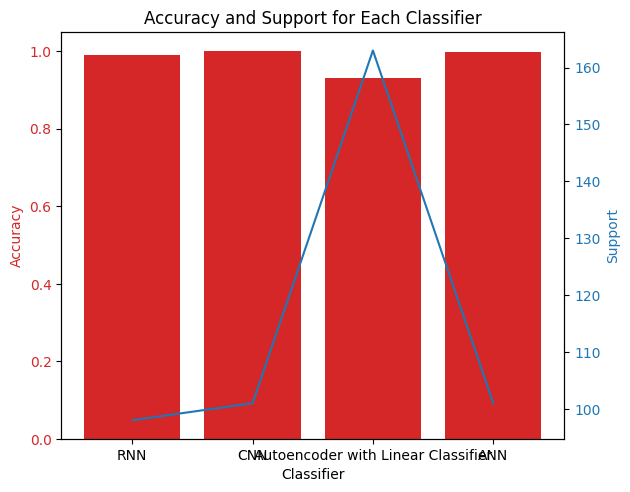

Classification Report for RNN:
   Metric  Value
Precision   0.65
   Recall   0.84
 Accuracy   0.99
  Support  98.00


Classification Report for CNN:
   Metric    Value
Precision   0.8400
   Recall   0.8100
 Accuracy   0.9993
  Support 101.0000


Classification Report for Autoencoder with Linear Classifier:
   Metric  Value
Precision   0.97
   Recall   0.40
 Accuracy   0.93
  Support 163.00


Classification Report for ANN:
   Metric   Value
Precision   0.410
   Recall   0.870
 Accuracy   0.997
  Support 101.000




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classification reports for each classifier
classification_reports = {
    'RNN': {
        'precision': 0.65,
        'recall': 0.84,
        'accuracy': 0.99,  # Example accuracy values
        'support': 98  # Example support values
    },
    'CNN': {
        'precision': 0.84,
        'recall': 0.81,
        'accuracy': 0.9993,  # Example accuracy values
        'support': 101 # Example support values
    },
    'Autoencoder Linear ': {
        'precision': 0.97,
        'recall': 0.40,
        'accuracy': 0.93,  # Example accuracy values
        'support': 163  # Example support values
    },
    'ANN': {
        'precision': 0.41,
        'recall': 0.87,
        'accuracy': 0.997,  # Example accuracy values
        'support': 101  # Example support values
    }
}

# Plot accuracy and support for each classifier
classifiers = list(classification_reports.keys())
accuracy_values = [report['accuracy'] for report in classification_reports.values()]
support_values = [report['support'] for report in classification_reports.values()]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Classifier')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(classifiers, accuracy_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Support', color=color)
ax2.plot(classifiers, support_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Accuracy and Support for Each Classifier')
plt.show()

# Display table for each classifier
import pandas as pd

for classifier, report in classification_reports.items():
    df = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'Accuracy', 'Support'],
        'Value': [report['precision'], report['recall'], report['accuracy'], report['support']]
    })
    print(f"Classification Report for {classifier}:")
    print(df.to_string(index=False))
    print('\n')


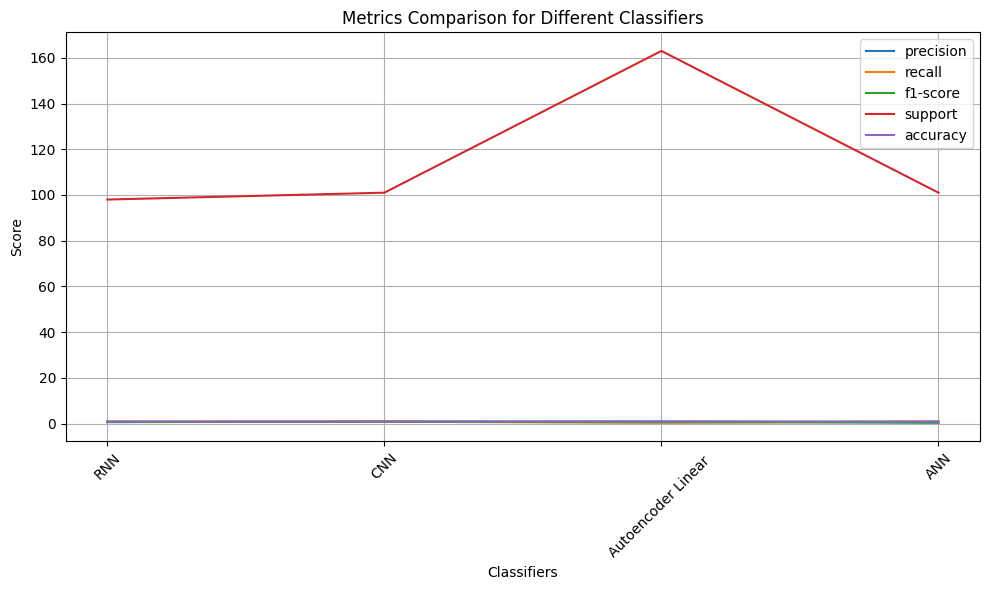

Classification Report for RNN:
precision     0.65
recall        0.84
f1-score      0.73
support      98.00
accuracy      0.99
Name: RNN, dtype: float64


Classification Report for CNN:
precision      0.84
recall         0.81
f1-score       0.82
support      101.00
accuracy       0.99
Name: CNN, dtype: float64


Classification Report for Autoencoder Linear :
precision      0.97
recall         0.40
f1-score       0.57
support      163.00
accuracy       0.93
Name: Autoencoder Linear , dtype: float64


Classification Report for ANN:
precision      0.410
recall         0.870
f1-score       0.560
support      101.000
accuracy       0.997
Name: ANN, dtype: float64




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Classification reports for each classifier
classification_reports = {
    'RNN': {
        'precision': 0.65,
        'recall': 0.84,
        'f1-score': 0.73,
        'support': 98,
        'accuracy': 0.99
    },
    'CNN': {
        'precision': 0.84,
        'recall': 0.81,
        'f1-score': 0.82,
        'support': 101,
        'accuracy': 0.99
    },
    'Autoencoder Linear ': {
        'precision': 0.97,
        'recall': 0.40,
        'f1-score': 0.57,
        'support': 163,
        'accuracy': 0.93
    },
    'ANN': {
        'precision': 0.41,
        'recall': 0.87,
        'f1-score': 0.56,
        'support': 101,
        'accuracy': 0.997
    }
}

# Convert classification reports to DataFrame
df = pd.DataFrame.from_dict(classification_reports, orient='index')

# Plot metrics
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['precision', 'recall', 'f1-score', 'support', 'accuracy']
classifiers = list(classification_reports.keys())

for metric in metrics:
    ax.plot(classifiers, df[metric], label=metric)

ax.set_title('Metrics Comparison for Different Classifiers')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Score')
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display table for each classifier
for classifier in classifiers:
    print(f"Classification Report for {classifier}:")
    print(df.loc[classifier])
    print('\n')


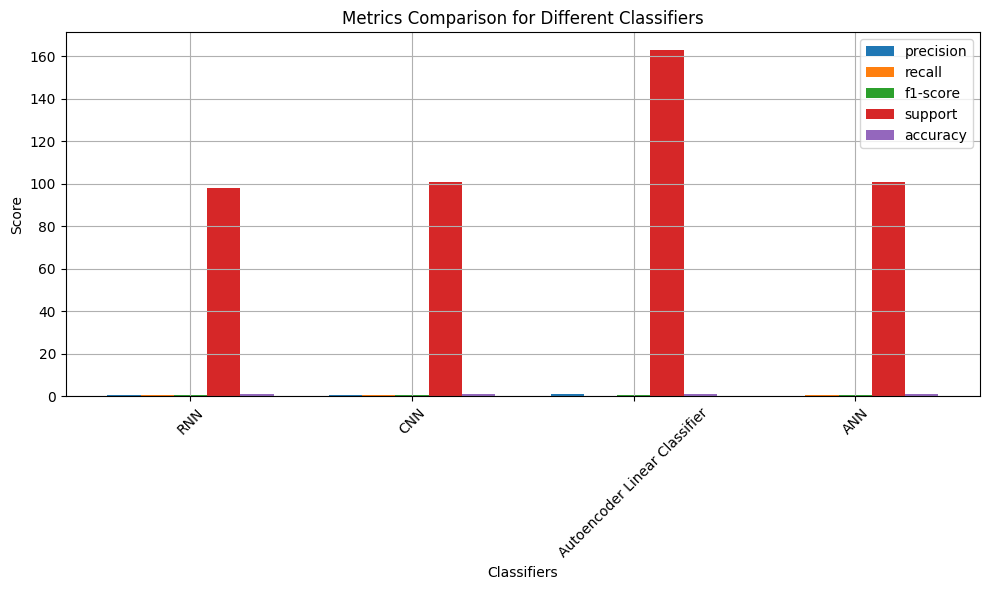

Classification Report for RNN:
precision     0.65
recall        0.84
f1-score      0.73
support      98.00
accuracy      0.99
Name: RNN, dtype: float64


Classification Report for CNN:
precision      0.84
recall         0.81
f1-score       0.82
support      101.00
accuracy       0.99
Name: CNN, dtype: float64


Classification Report for Autoencoder Linear Classifier:
precision      0.97
recall         0.40
f1-score       0.57
support      163.00
accuracy       0.93
Name: Autoencoder Linear Classifier, dtype: float64


Classification Report for ANN:
precision      0.410
recall         0.870
f1-score       0.560
support      101.000
accuracy       0.997
Name: ANN, dtype: float64




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Classification reports for each classifier
classification_reports = {
    'RNN': {
        'precision': 0.65,
        'recall': 0.84,
        'f1-score': 0.73,
        'support': 98,
        'accuracy': 0.99
    },
    'CNN': {
        'precision': 0.84,
        'recall': 0.81,
        'f1-score': 0.82,
        'support': 101,
        'accuracy': 0.99
    },
    'Autoencoder Linear Classifier': {
        'precision': 0.97,
        'recall': 0.40,
        'f1-score': 0.57,
        'support': 163,
        'accuracy': 0.93
    },
    'ANN': {
        'precision': 0.41,
        'recall': 0.87,
        'f1-score': 0.56,
        'support': 101,
        'accuracy': 0.997
    }
}


# Convert classification reports to DataFrame
df = pd.DataFrame.from_dict(classification_reports, orient='index')

# Plot metrics as bar graph
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['precision', 'recall', 'f1-score', 'support', 'accuracy']
classifiers = list(classification_reports.keys())

bar_width = 0.15
index = np.arange(len(classifiers))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, df[metric], bar_width, label=metric)

ax.set_title('Metrics Comparison for Different Classifiers')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Score')
ax.set_xticks(index + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(classifiers)
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display table for each classifier
for classifier in classifiers:
    print(f"Classification Report for {classifier}:")
    print(df.loc[classifier])
    print('\n')


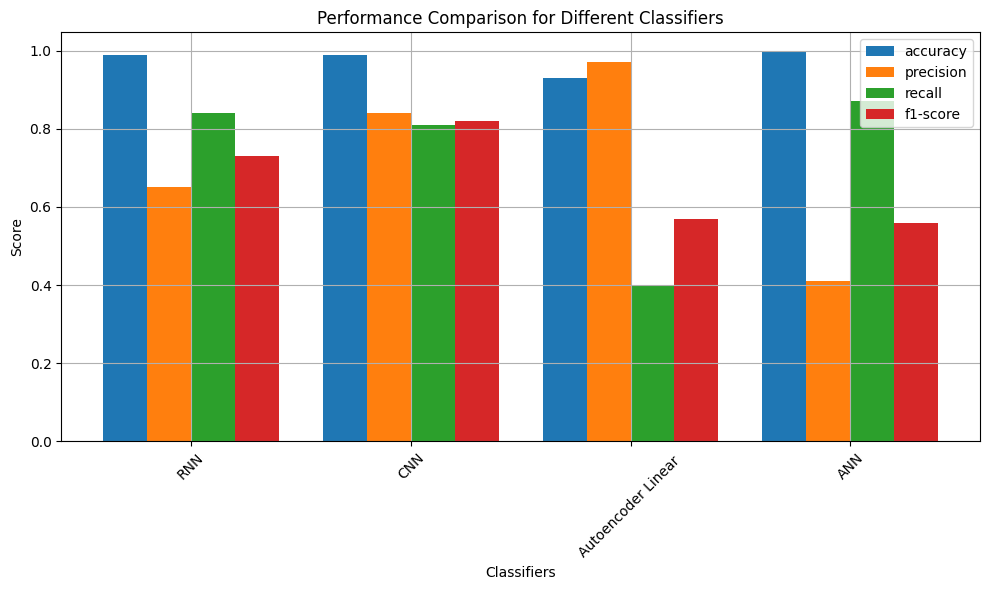

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Classification reports for each classifier
classification_reports = {
    'RNN': {
        'precision': 0.65,
        'recall': 0.84,
        'f1-score': 0.73,
        'support': 98,
        'accuracy': 0.99
    },
    'CNN': {
        'precision': 0.84,
        'recall': 0.81,
        'f1-score': 0.82,
        'support': 101,
        'accuracy': 0.99
    },
    'Autoencoder Linear ': {
        'precision': 0.97,
        'recall': 0.40,
        'f1-score': 0.57,
        'support': 163,
        'accuracy': 0.93
    },
    'ANN': {
        'precision': 0.41,
        'recall': 0.87,
        'f1-score': 0.56,
        'support': 101,
        'accuracy': 0.997
    }
}

# Convert classification reports to DataFrame
df = pd.DataFrame.from_dict(classification_reports, orient='index')

# Plot performance metrics for each classifier
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
classifiers = list(classification_reports.keys())

bar_width = 0.2
index = np.arange(len(classifiers))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, df[metric], bar_width, label=metric)

ax.set_title('Performance Comparison for Different Classifiers')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Score')
ax.set_xticks(index + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(classifiers)
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
classification_reports = {
    'RNN': {
        'precision': 0.65,
        'recall': 0.84,
        'f1-score': 0.73,
        'support': 98,
        'accuracy': 0.99
    },
    'CNN': {
        'precision': 0.84,
        'recall': 0.81,
        'f1-score': 0.82,
        'support': 101,
        'accuracy': 0.99
    },
    'Autoencoder Linear Classifier': {
        'precision': 0.97,
        'recall': 0.40,
        'f1-score': 0.57,
        'support': 163,
        'accuracy': 0.93
    },
    'ANN': {
        'precision': 0.41,
        'recall': 0.87,
        'f1-score': 0.56,
        'support': 101,
        'accuracy': 0.997
    }
}
